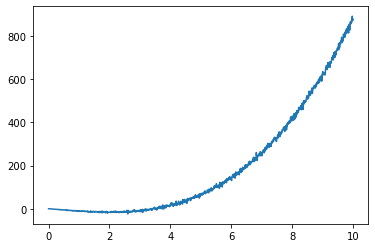

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
from sklearn.utils.random import check_random_state

x =  np.arange(0,10,0.01)
y = np.power(x,3) - np.multiply(12,x) + np.multiply(np.random.randn(len(x))*1,x)

plt.plot(x,y)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
y_scaled = scaler.fit_transform(y.reshape(-1, 1))
# Define the network model and its arguments. 
# Set the number of neurons/nodes for each layer:
model = Sequential()
# model.add(Dense(10, input_dim=1, activation='tanh'))
model.add(Dense(500, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model and calculate its accuracy:
model.compile(loss='MeanSquaredError', optimizer='adam')

# Print a summary of the Keras model:
model.summary()

# Train this thing
model.fit(x, y_scaled, epochs = 100)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               1000      
                                                                 
 dense_13 (Dense)            (None, 1)                 501       
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 0s 920us/step - loss: 0.0687
Epoch 2/100
32/32 [==============================] - 0s 808us/step - loss: 0.0204
Epoch 3/100
32/32 [==============================] - 0s 801us/step - loss: 0.0154
Epoch 4/100
32/32 [==============================] - 0s 793us/step - loss: 0.0146
Epoch 5/100
32/32 [==============================] - 0s 819us/step - loss: 0.0144
Epoch 6/100
32/32 [===================

32/32 [==============================] - 0s 681us/step


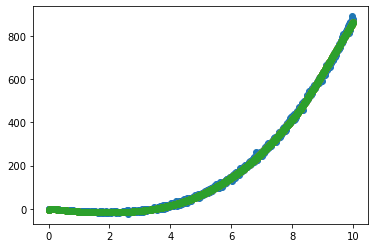

In [19]:
predictions_scaled = model.predict(x)
predictions = scaler.inverse_transform(predictions_scaled)
# plt.scatter(x.reshape(-1, 1),predictions)
plt.scatter(x,y)
plt.scatter(x,predictions)

In [22]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(0, 10, 100).reshape(100, )
predictions_scaled = model.predict(X_train)
y_train = scaler.inverse_transform(predictions_scaled)

est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train.reshape(-1, 1), y_train)

print(est_gp._program)




4/4 [==============================] - 0s 1ms/step
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/Users/fascetti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   0    48.81      1.81167e+06       63          15.4713          10.9065      1.46m
   1    46.27          1248.82      125          10.3761          5.70114      1.17m
   2    59.69           222951      137          5.76967          47.5561      1.20m
   3    78.16          75516.1      125          4.44666          3.95276      1.25m
   4    90.97           517543       97           3.6165          4.07088      1.27m
   5   106.61          5459.18        9          1.35846          1.87993      1.31m
   6    97.49          7439.17        9          1.42553          1.27632      1.19m
   7    80.57          1861.06        9           1.2392          2.95329     57.29s
   8    69.36          3183.68        9          1.24926          2.86274     49.06s
   9    74.72          12244.4        9          1.26393          2.73077     46.56s
  10    60.53          1194.39      113          1.16937          1.47209     37.27s
  11    25.46          1236.67       91          1.08766         

In [7]:
from sklearn.utils.random import check_random_state
from gplearn.genetic import SymbolicRegressor
import numpy as np

rng = check_random_state(0)

# Training samples
X_train = rng.uniform(0, 10, 100).reshape(100, )
y_train = X_train**3 -12*X_train + np.multiply(np.random.randn(len(X_train))*1,X_train)

est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train.reshape(-1, 1), y_train)

print(est_gp._program)




    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    48.81      1.81167e+06      127           15.499          16.0533      1.44m
   1    46.21          1250.15      125           11.169          6.55346      1.19m
   2    59.33           222950      137          6.61532           47.778      1.20m
   3    75.66          74850.2      125          5.58251          5.61854      1.31m
   4    87.63           519045       59          4.69095           4.8317      1.28m
   5   104.13          1983.07       35          3.85569          3.17221      1.35m
   6    92.96          2824.92       11          3.38222          2.46721      1.14m
   7    73.33           763302        9          3.11954          5.59352     56.78s
   8    60.99          2176.67       47          3.05095           4.6777  

$ (-0.613/0.05 + x^2) * x $

$ x^3 - 0.613/0.05 * x = x^3 - 12.26x$

$x^3 - 12x $

In [1]:
0.613/0.05


12.26

**The genetic algorithm returns the following expression:**

$x (x^2 - 0.613/0.05)= x^3 - 12.26 x$


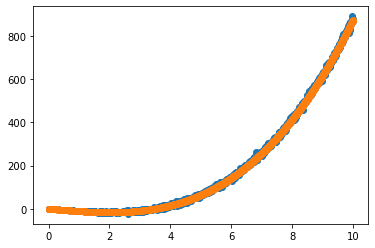

In [24]:
def f_x(x):
    return x*(x**2 - 0.613/0.05)

plt.scatter(x,y)
plt.scatter(x,f_x(x))
